<a href="https://colab.research.google.com/github/Jit-Saha/ML-MINOR-APRIL/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet

     |████████████████████████████████| 8.2MB 7.7MB/s 
     |████████████████████████████████| 4.2MB 46.2MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 174kB 49.3MB/s 
     |████████████████████████████████| 112kB 48.4MB/s 
     |████████████████████████████████| 122kB 42.6MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [3]:
#Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import svm
import pickle
from pyngrok import ngrok
from PIL import Image

In [4]:
#Pre-processing
target = []
images = []
flat_data = []

datadir = '/content/drive/MyDrive/ML SmartKnowers/MinorProject'
categories = ['Cricket Bat','Playing Ball']

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    if img.endswith('.jpg') or img.endswith('.jpeg') or img.endswith('.png'):
      img_arr = imread(os.path.join(path,img))
      img_resized = resize(img_arr,(150,150,3))
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

<BarContainer object of 2 artists>

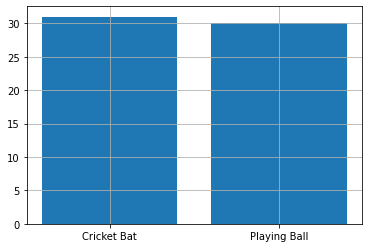

In [31]:
unique, count = np.unique(target,return_counts=True)
plt.grid()
plt.bar(categories,count)

In [6]:
#Data Spliting
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=120)

In [7]:
param_grid = [ {'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']} ]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [9]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [10]:
 accuracy_score(y_pred,y_test)

0.9230769230769231

In [11]:
confusion_matrix(y_pred,y_test)

array([[9, 1],
       [0, 3]])

In [12]:
pickle.dump(clf,open('ImageRecog.p','wb'))

In [13]:
model = pickle.load(open('ImageRecog.p','rb'))

Enter your URL:https://image.shutterstock.com/image-photo/cricket-bat-isolated-on-white-260nw-1338243737.jpg
(280, 260, 3)
0
<class 'numpy.int64'>
PREDICTED OUTPUT IS:Cricket Bat


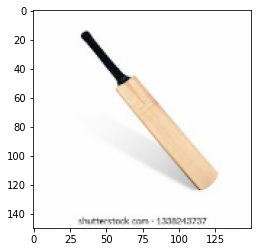

In [14]:
flat_data=[]
url=input("Enter your URL:")
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
print(y_out[0])
print(type(y_out[0]))
y_out=categories[y_out[0]]
print(f'PREDICTED OUTPUT IS:{y_out}')

In [38]:
%%writefile ImageClassifier.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import pickle

st.title('Bat and Ball detector using M.L.')
st.text('Upload to predict.....')

model=pickle.load(open('ImageRecog.p','rb'))
uploaded_file=st.file_uploader("Upload an Image:",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  if st.button('PREDICT'):
    categories = ['Cricket Bat','Playing Ball']
    st.write('Result: ')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resized)
    y_out = model.predict(flat_data)
    y_out = [y_out[0]]
    st.title(f'Predicted Output Is: {categories[y_out[0]]} ')
    percent = model.predict_proba(flat_data)
    for index, item in enumerate(categories):
      st.write(f'{ item } : {percent[0][index]*100}%')


Overwriting ImageClassifier.py


In [16]:
!nohup streamlit run ImageClassifier.py &

url = ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'


'http://7862619b51d0.ngrok.io'